<a href="https://colab.research.google.com/github/JGH94/python_BabyName/blob/main/python_BabyName.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# file  https://www.ssa.gov/oact/babynames/limits.html 
# National Data 다운로드

In [ ]:
name_2021 = pd.read_csv('/content/Data/yob2021.txt', names = ['name','sex','bir'])
print(name_2021) # 데이터 확인 시, 최소 5명 이상 데이터

            name sex    bir
0         Olivia   F  17728
1           Emma   F  15433
2      Charlotte   F  13285
3         Amelia   F  12952
4            Ava   F  12759
...          ...  ..    ...
31532     Zyeire   M      5
31533       Zyel   M      5
31534      Zyian   M      5
31535      Zylar   M      5
31536        Zyn   M      5

[31537 rows x 3 columns]


In [ ]:
# 남자, 여자 출생 수
name_2021.groupby('sex').bir.sum()

sex
F    1627098
M    1734277
Name: bir, dtype: int64

In [ ]:
# 각 데이터 만들기 2000년부터 2021까지
years_ = range(2000, 2022)
pieces = []
for year in years_:
  path = '/content/Data/yob%d.txt' % year
  frame = pd.read_csv(path, names = ['name','sex','bir'])

  frame['year'] = year
  pieces.append(frame)
# 통합
names = pd.concat(pieces, ignore_index = True)
print(names)

           name sex    bir  year
0         Emily   F  25957  2000
1        Hannah   F  23085  2000
2       Madison   F  19968  2000
3        Ashley   F  17997  2000
4         Sarah   F  17708  2000
...         ...  ..    ...   ...
719768   Zyeire   M      5  2021
719769     Zyel   M      5  2021
719770    Zyian   M      5  2021
719771    Zylar   M      5  2021
719772      Zyn   M      5  2021

[719773 rows x 4 columns]


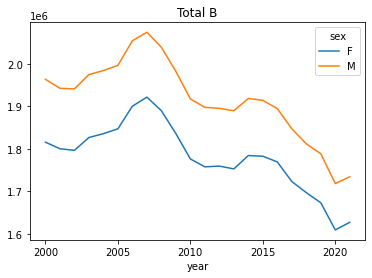

In [ ]:
total_B = names.pivot_table('bir', index = 'year', columns = 'sex', aggfunc = sum)
total_B
total_B.plot(title='Total B')

In [ ]:
def prop_(group):
  group['prop'] = group.bir / group.bir.sum()
  return group
# 성별 기준으로 나눔
names_ = names.groupby(['year','sex']).apply(prop_)
print(names_)
# 합이 1이 되는지 확인
names_.groupby(['year','sex']).prop.sum()

           name sex    bir  year      prop
0         Emily   F  25957  2000  0.014296
1        Hannah   F  23085  2000  0.012714
2       Madison   F  19968  2000  0.010997
3        Ashley   F  17997  2000  0.009912
4         Sarah   F  17708  2000  0.009753
...         ...  ..    ...   ...       ...
719768   Zyeire   M      5  2021  0.000003
719769     Zyel   M      5  2021  0.000003
719770    Zyian   M      5  2021  0.000003
719771    Zylar   M      5  2021  0.000003
719772      Zyn   M      5  2021  0.000003

[719773 rows x 5 columns]


year  sex
2000  F      1.0
      M      1.0
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
2011  F      1.0
      M      1.0
2012  F      1.0
      M      1.0
2013  F      1.0
      M      1.0
2014  F      1.0
      M      1.0
2015  F      1.0
      M      1.0
2016  F      1.0
      M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
2019  F      1.0
      M      1.0
2020  F      1.0
      M      1.0
2021  F      1.0
      M      1.0
Name: prop, dtype: float64

In [ ]:
# Top 1000 이름
pic_ = []
for y_, g_ in names_.groupby(['year','sex']):
  pic_.append(g_.sort_values(by='bir', ascending = False)[:1000])

top_1000 = pd.concat(pic_, ignore_index = True)
# 데이터가 줄어들었다.
print(names_.count())
print(top_1000.count()) 

name    719773
sex     719773
bir     719773
year    719773
prop    719773
dtype: int64
name    44000
sex     44000
bir     44000
year    44000
prop    44000
dtype: int64


              name sex    bir  year      prop
1000         Jacob   M  34489  2000  0.017564
1001       Michael   M  32040  2000  0.016316
1002       Matthew   M  28575  2000  0.014552
1003        Joshua   M  27538  2000  0.014024
1004   Christopher   M  24935  2000  0.012698
...            ...  ..    ...   ...       ...
43995          Zev   M    218  2021  0.000126
43996       Harris   M    217  2021  0.000125
43997       Ronnie   M    217  2021  0.000125
43998      Merrick   M    217  2021  0.000125
43999       Mayson   M    217  2021  0.000125

[22000 rows x 5 columns]
-------------------------------------
            name sex    bir  year      prop
0          Emily   F  25957  2000  0.014296
1         Hannah   F  23085  2000  0.012714
2        Madison   F  19968  2000  0.010997
3         Ashley   F  17997  2000  0.009912
4          Sarah   F  17708  2000  0.009753
...          ...  ..    ...   ...       ...
42995     Soleil   F    255  2021  0.000157
42996     Sandra   F    255  202

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f194db11280>,
      dtype=object)

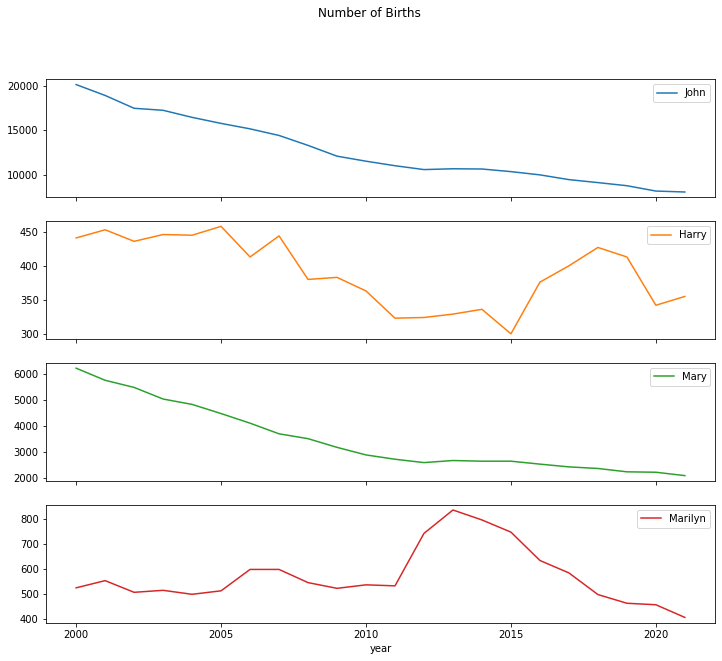

In [ ]:
boy_name = top_1000[top_1000.sex == 'M']
girl_name =  top_1000[top_1000.sex == 'F']
print(boy_name)
print('-------------------------------------')
print(girl_name)
print('-------------------------------------')

total_B = top_1000.pivot_table('bir', index = 'year', columns = 'name', aggfunc=sum) 
sub_set = total_B[['John','Harry','Mary','Marilyn']]
sub_set.plot(subplots = True, figsize=(12,10), grid = False, title = 'Number of Births')

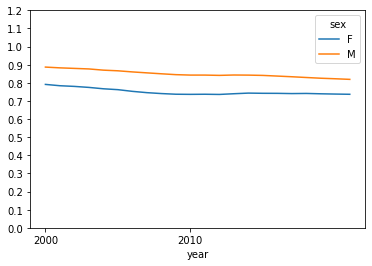

In [32]:
#추세 확인하기
table_ = top_1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc=sum)
# 약간의 감소추세
table_.plot(yticks= np.linspace(0,1.2,13), xticks=range(2000,2020,10))

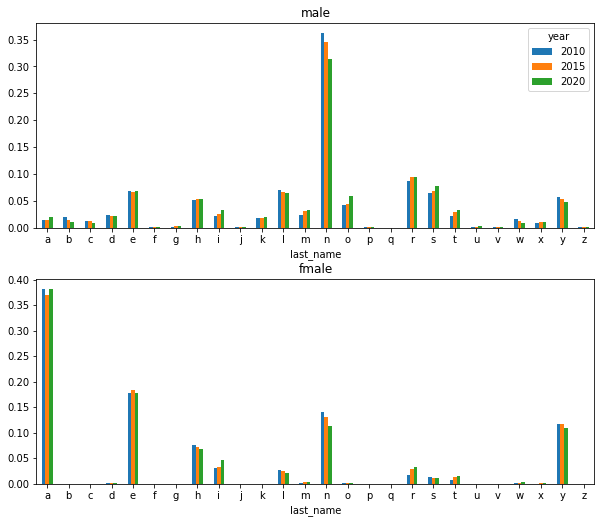

In [44]:
last_name = names_.name.map(lambda x:x[-1])
last_name.name = 'last_name'
N_Table = names.pivot_table('bir',index=last_name, columns = ['sex','year'],aggfunc = sum)
sub_Table_ = N_Table.reindex(columns= [2010,2015,2020], level='year')
sub_Table_.head()
name_prop = sub_Table_ / sub_Table_.sum()
# 남자, 여자 마지막 끝나는 스펠링 이름 년도 별 시각화
fig, axes = plt.subplots(2,1,figsize=(10,8))
name_prop['M'].plot(kind = 'bar', rot =0, ax=axes[0], title = 'male')
name_prop['F'].plot(kind = 'bar', rot =0, ax=axes[1], title = 'fmale', legend=False)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.25)

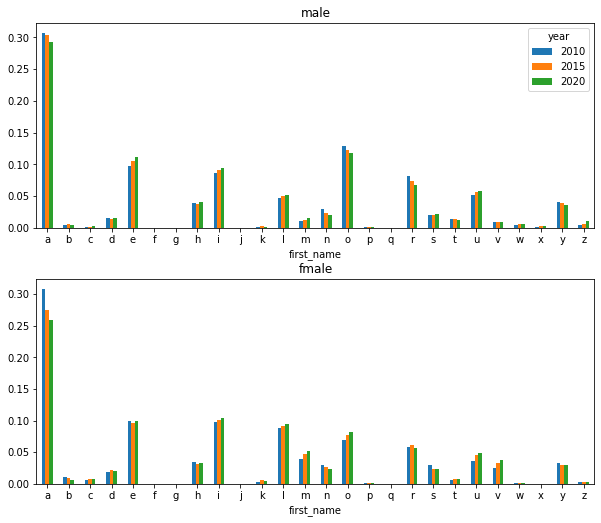

In [56]:
first_name = names_.name.map(lambda x:x[1])
first_name.name = 'first_name'
N_Table = names.pivot_table('bir',index=first_name, columns = ['sex','year'],aggfunc = sum)
sub_Table_ = N_Table.reindex(columns= [2010,2015,2020], level='year')
sub_Table_.head()
name_prop = sub_Table_ / sub_Table_.sum()
# 남자, 여자 시작하는 스펠링 이름 년도 별 시각화
fig, axes = plt.subplots(2,1,figsize=(10,8))
name_prop['M'].plot(kind = 'bar', rot =0, ax=axes[0], title = 'male')
name_prop['F'].plot(kind = 'bar', rot =0, ax=axes[1], title = 'fmale', legend=False)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.25)

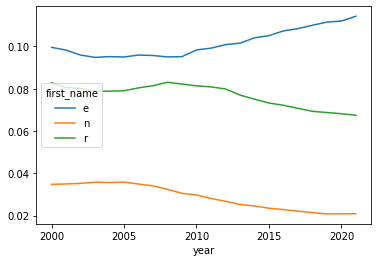

In [57]:
# 사용 빈도 흐름
name_prop = N_Table / N_Table.sum() 
dny_ts = name_prop.loc[['e','n','r'],'M'].T
dny_ts.plot()